In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split

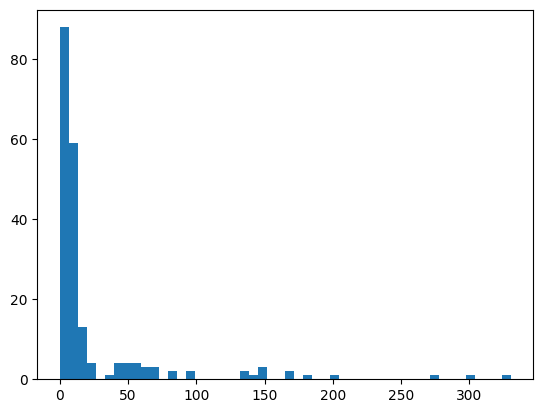

In [2]:
# Load data
X_train = np.load('X_train.npy')
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")

# Add column of ones for the intercept
ones = np.ones((200,1))
X = np.hstack((ones,X_train))

# Do a least square fit
beta_LS = np.matmul(np.matmul(inv(np.matmul(X.transpose(),X)),X.transpose()),y_train)
y_hat_LS = np.matmul(X,beta_LS)

# Compute squared errors
SE = (y_train-y_hat_LS)**2

# Create histogram of squared errors
plt.hist(SE, bins=50)
plt.show()


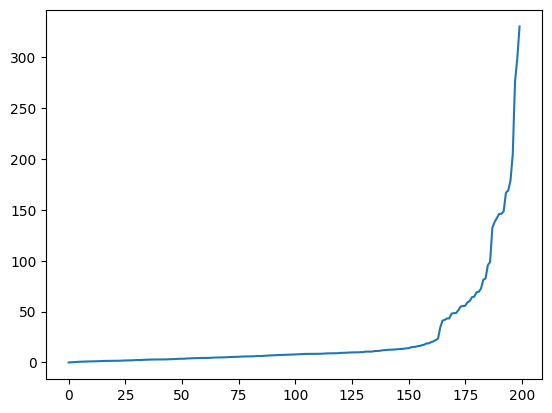

In [3]:
# Sort and plot the squared errors
plt.plot(np.sort(SE))
plt.show()

In [4]:
# Define threshold
thres = 25

# Remove outliers from training data
X_train = np.delete(X_train,np.where(SE>thres), axis=0)
y_train = np.delete(y_train,np.where(SE>thres), axis=0)

In [5]:
# Check dimensions
print(X_train.shape)
print(y_train.shape)

(164, 5)
(164,)


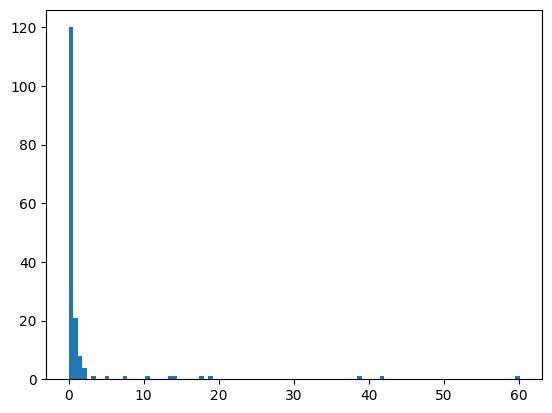

In [6]:
# Repeat the whole process to check for more outliers
ones_164 = np.ones((164,1))
X = np.hstack((ones_164,X_train))
beta_LS = np.matmul(np.matmul(inv(np.matmul(X.transpose(),X)),X.transpose()),y_train)
y_hat_LS = np.matmul(X,beta_LS)
SE = (y_train-y_hat_LS)**2
plt.hist(SE, bins=100)
plt.show()

In [7]:
# Remove additional outliers
thres = 5
X_train = np.delete(X_train,np.where(SE>thres), axis=0)
y_train = np.delete(y_train,np.where(SE>thres), axis=0)

In [8]:
# Check dimensions
print(X_train.shape)
print(y_train.shape)

(154, 5)
(154,)


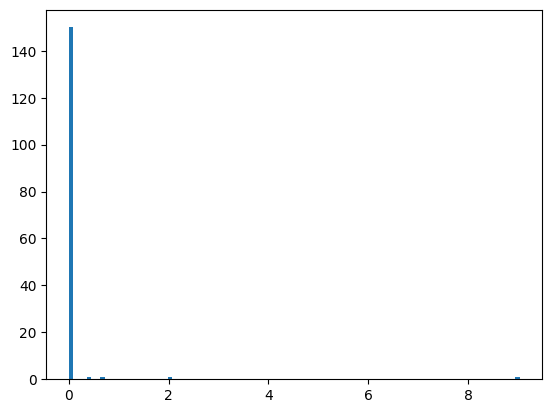

In [9]:
# Repeat the whole process to check for more outliers
ones_164 = np.ones((154,1))
X = np.hstack((ones_164,X_train))
beta_LS = np.matmul(np.matmul(inv(np.matmul(X.transpose(),X)),X.transpose()),y_train)
y_hat_LS = np.matmul(X,beta_LS)
SE = (y_train-y_hat_LS)**2
plt.hist(SE, bins=100)
plt.show()

In [10]:
# Remove additional outliers
thres = 0.2
X_train = np.delete(X_train,np.where(SE>thres), axis=0)
y_train = np.delete(y_train,np.where(SE>thres), axis=0)

In [11]:
# Check dimensions
print(X_train.shape)
print(y_train.shape)

(150, 5)
(150,)


In [12]:
# Split training data into training and validation
X_train_part, X_validation_part, y_train_part, y_validation_part = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
# HAVE NOT BEEN USED:
# Standardize X
#scaler_X = StandardScaler()
#X_train_standardized = scaler_X.fit_transform(X_train)
# Standardize y
#scaler_y = StandardScaler()
#y_train_standardized = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

In [ ]:
# Perform ridge regression 
model_ridge = RidgeCV(alphas=np.logspace(-5,5,10000), fit_intercept=True, store_cv_values=True) 
model_ridge.fit(X_train_part, y_train_part)
print("optimal alpha for ridge is ", model_ridge.alpha_)
y_prediction_ridge = model_ridge.predict(X_validation_part)
SSE_ridge = np.sum((y_prediction_ridge-y_validation_part)**2)

# Perform lasso regression
model_lasso = LassoCV(alphas=np.logspace(-5,5,10000), fit_intercept=True) 
model_lasso.fit(X_train_part, y_train_part)
print("optimal alpha for lasso is ", model_lasso.alpha_)
y_prediction_lasso = model_lasso.predict(X_validation_part)
SSE_lasso = np.sum((y_prediction_lasso-y_validation_part)**2)

if SSE_lasso > SSE_ridge:
    print(f'Ridge regression has smallest SSE with {SSE_ridge} < {SSE_lasso}')
if SSE_ridge > SSE_lasso:
    print(f'Lasso regression has smallest SSE with {SSE_lasso} < {SSE_ridge}')

In [138]:
# HAVE NOT BEEN USED:
# Perform ridge regression with optimal regularization parameter 
#model = Ridge(model.alpha_) 
#model.fit(X_train, y_train)
#y_prediction_standardized = model.predict(X_train_standardized)
#y_prediction_unscaled = scaler_y.inverse_transform(y_prediction_standardized.reshape(-1, 1)).ravel()  # Flatten back to 1D

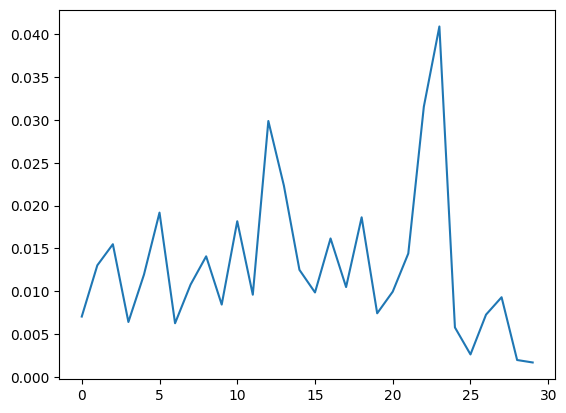

In [139]:
# Visualize absolute erros
plt.plot(np.abs(y_prediction_ridge-y_validation_part))
plt.show()

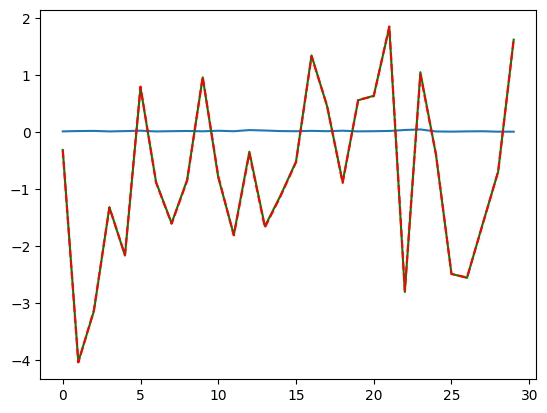

In [140]:
# Visualize absolute erros and validation y
plt.figure()
plt.plot(np.abs(y_prediction_ridge-y_validation_part))
plt.plot(y_validation_part, color='g')
plt.plot(y_prediction_ridge,'--', color='r')
plt.show()

In [141]:
# Train final ridge model
model_final = RidgeCV(alphas=np.logspace(-5,5,1000), fit_intercept=True, store_cv_values=True) 
model_final.fit(X_train, y_train)
print("optimal alpha for ridge is ", model_final.alpha_)
# Predict using the test data
y_prediction_final = model_final.predict(X_test)

optimal alpha for ridge is  1066.664958279541


In [3]:
# Save prediction
np.save('prediction',y_prediction_final)

NameError: name 'y_prediction_final' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

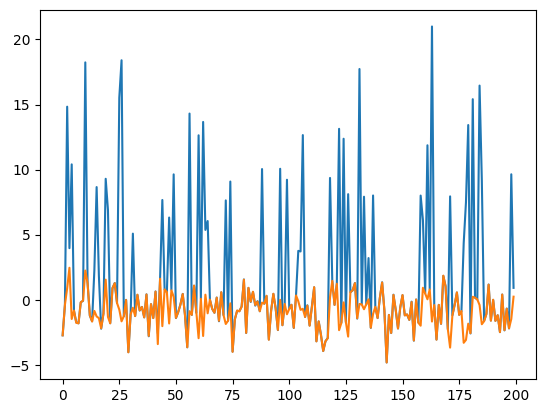

In [146]:
y_train_original = np.load("y_train.npy")
plt.figure()
plt.plot(y_train_original)
plt.plot(y_prediction_final)
plt.show